In [1]:
# Mount Google drive for data loading
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import basic libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load data into a dataframe
df = pd.read_csv('/content/drive/MyDrive/Datasets/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
# Drop unnecessary columns
df = df.drop('Gender', axis=1)
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [5]:
# Basic EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  10000 non-null  float64
 1   Weight  10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


In [6]:
# Basic statistics of the dataset
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [7]:
# Drop null values
df.dropna()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [8]:
# Find correlation between the the features -
# values close to 1 means high correlation and close to zero means low correlation
df.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


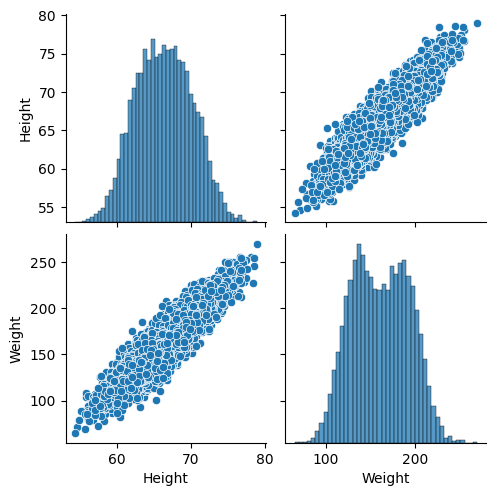

In [9]:
import seaborn as sns
sns.pairplot(df)

In [10]:
# Import scikit libs for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
# Assign X to the independent variable
X = df[['Height']]
X.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [12]:
# Assign Y to the dependent variable
y = df['Weight']
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [13]:
# Divide the whole dataset into 70% and 30% train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
# Import scikit lib to standardize the
from sklearn.preprocessing import StandardScaler

In [15]:
# Standardize the train dataset using fit_transform
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [16]:
# Standardize the test dataset against the train datasets Z-Score using 'transform()'
X_test = scaler.transform(X_test)

In [17]:
# Build the Linear Regression Model
LR = LinearRegression()

In [18]:
LR.fit(X_train,y_train)

LinearRegression()

In [19]:
# Find the coefficient/slope and intercept
print(f"Coefficient or Slope: ",LR.coef_)

Coefficient or Slope:  [29.58846002]


In [20]:
print(f"Intercept: ",LR.intercept_)

Intercept:  161.03928298005613


In [21]:
y_pred = LR.predict(X_test)

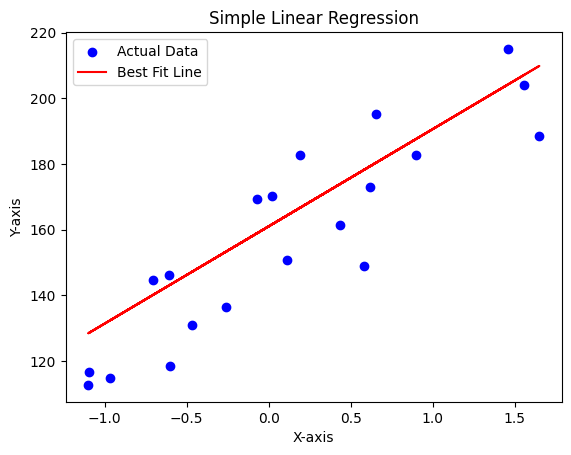

In [22]:
# Visualize the data and the regression line/best fit line
plt.scatter(X_test[:20], y_test[:20], color='b', label='Actual Data')
plt.plot(X_test[:20], y_pred[:20], color='r', label='Best Fit Line')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Simple Linear Regression')
plt.show()

In [23]:
# Model metrics evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [24]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error:{mse:.2f}")
print(f"Mean Absolute Error:{mae:.2f}")
print(f"Root Mean Squared Error:{rmse:.2f}")

Mean Squared Error:148.36
Mean Absolute Error:9.71
Root Mean Squared Error:12.18


In [25]:
# R^2 and Adjusted R^2 score
r2 = r2_score(y_test,y_pred)
print(f"R_squared:{r2:.2f}")

R_squared:0.86


In [26]:
adj_r2 = 1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f"Adjusted_R_squared:{adj_r2:.2f}")

Adjusted_R_squared:0.86


In [27]:
# Predicting the model against new data
y_pred_sample = LR.predict(scaler.transform([[70]]))
y_pred_sample

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([189.35642613])